In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

데이터 불러오기

In [6]:
path = ('./data/final/Naver_Final.csv')
pd.read_csv(path, encoding='cp949')

,Attraction,Good_Point,Selected_People
0,동대문역사문화공원,뷰가 좋아요,22
1,동대문역사문화공원,관리가 잘 되어있어요,21
2,동대문역사문화공원,볼거리가 많아요,14
3,동대문역사문화공원,사진이 잘 나와요,12
4,동대문역사문화공원,산책로가 잘 되어있어요,12
...,...,...,...
17523,파로스관광호텔,인테리어가 멋져요,2
17524,파로스관광호텔,주차하기 편해요,2
17525,파로스관광호텔,사진이 잘 나와요,1
17526,파로스관광호텔,수영장이 잘 되어있어요,1


In [7]:
raw = pd.read_csv(path, encoding='cp949')
df = raw.copy()

In [8]:
df

,Attraction,Good_Point,Selected_People
0,동대문역사문화공원,뷰가 좋아요,22
1,동대문역사문화공원,관리가 잘 되어있어요,21
2,동대문역사문화공원,볼거리가 많아요,14
3,동대문역사문화공원,사진이 잘 나와요,12
4,동대문역사문화공원,산책로가 잘 되어있어요,12
...,...,...,...
17523,파로스관광호텔,인테리어가 멋져요,2
17524,파로스관광호텔,주차하기 편해요,2
17525,파로스관광호텔,사진이 잘 나와요,1
17526,파로스관광호텔,수영장이 잘 되어있어요,1


In [10]:
# 이런 점이 좋아요 중복 제거한 개수
df['Good_Point'].nunique()

230

In [13]:
# 이런 점이 좋아요 중복 제거 리스트
good_point_list = list(df['Good_Point'].unique())

In [19]:
# 이런 점이 좋아요별 투표수 합산
good_point_df = pd.DataFrame(df.groupby('Good_Point')['Selected_People'].sum())

In [27]:
# 이런 점이 좋아요 투표수 합산한 Data를 정렬(sort)
good_point_df_sort = pd.DataFrame(good_point_df['Selected_People'].sort_values(ascending=False))

In [35]:
good_point_df_sort= good_point_df_sort.reset_index()

In [47]:
good_point_df_sort

,Good_Point,Selected_People
0,음식이 맛있어요,298955
1,친절해요,148906
2,특별한 메뉴가 있어요,81785
3,매장이 넓어요,76248
4,재료가 신선해요,69886
...,...,...
225,피팅이 자유로워요,2
226,라이브공연이 훌륭해요,1
227,스토리가 탄탄해요,1
228,좋은 제품을 사용해요,1


그래프 시각화

In [58]:
import plotly.graph_objects as go

# 데이터 생성
x = good_point_df_sort.index
y = good_point_df_sort['Selected_People']

# 미분 진행 >> 기울기 급변 지점 파악용
dx = x[0] - x[1]
dy = np.diff(y) / dx

# 그래프 그리기

fig = go.Figure(data=go.Scatter(x=x, y=y))

fig.add_trace(go.Scatter(x=x[:-1], y=dy, mode='lines', name='Derivative'))

fig.update_layout(width=1600, height=600, title="관광지 전체", xaxis_title="Index", yaxis_title="Selected People")

fig.show()


In [54]:
# 1번째 분기점 : 23
good_point_df_sort.iloc[:24]

,Good_Point,Selected_People
0,음식이 맛있어요,298955
1,친절해요,148906
2,특별한 메뉴가 있어요,81785
3,매장이 넓어요,76248
4,재료가 신선해요,69886
5,가성비가 좋아요,67654
6,양이 많아요,63724
7,주차하기 편해요,60683
8,뷰가 좋아요,59918
9,인테리어가 멋져요,56341


In [55]:
# 2번째 분기점 : 52
good_point_df_sort.iloc[24:53]

,Good_Point,Selected_People
24,관리가 잘 되어있어요,16093
25,화장실이 깨끗해요,15787
26,규모가 커요,15775
27,디저트가 맛있어요,15584
28,깨끗해요,13082
29,음료가 맛있어요,12877
30,베스트셀러가 많아요,12480
31,체험 프로그램이 다양해요,12399
32,신간이 빨리 들어와요,12116
33,품질이 좋아요,11396


boxplot 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x20187081910>,
 'caps': [<matplotlib.lines.Line2D at 0x20187082dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20182ae3010>],
 'medians': [<matplotlib.lines.Line2D at 0x201870901d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20187090a50>],
 'means': []}

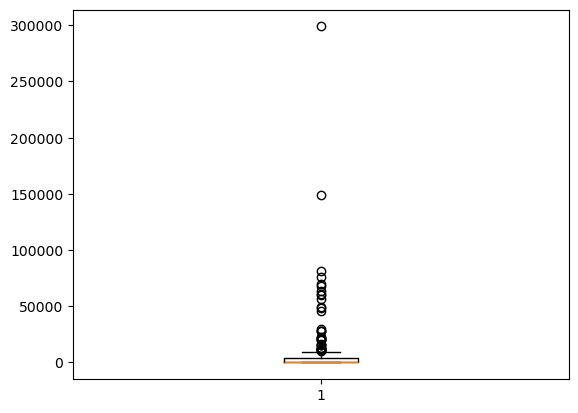

In [60]:
plt.boxplot(good_point_df_sort['Selected_People'])